In [22]:
from pycaret.datasets import get_data
from pycaret.anomaly import *

import pandas as pd

data = pd.read_csv('FormattedData/train.csv')
data_unseen = pd.read_csv('FormattedData/test.csv')

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

exp_ano101 = setup(data, normalize = True, 
                   ignore_features = ['Timestamp'],
                   session_id = 123)






,Description,Value
0,session_id,123
1,Original Data,"(3371, 9)"
2,Missing Values,0
3,Numeric Features,8
4,Categorical Features,0
5,Ordinal Features,0
6,High Cardinality Features,0
7,High Cardinality Method,None
8,Transformed Data,"(3371, 8)"
9,CPU Jobs,-1


In [23]:
#Create model: LOF
lof = create_model('lof')
lof_results = assign_model(lof)
lof_results.head()

,Timestamp,MON1 CL DDM (?A),MON1 CL RF (dB),MON1 DS DDM (?A),MON1 DS RF (dB),MON1 NF DDM (?A),MON1 NF RF (dB),MON1 CLR DDM (?A),MON1 CLR RF (dB),Anomaly,Anomaly_Score
0,2022-01-28 14:11:19,2.02,0.32,0.87,0.29,-3.18,0.19,2.31,0.34,0,0.988443
1,2022-01-28 14:16:19,1.74,0.32,0.87,0.29,-2.89,0.19,2.31,0.34,0,0.994925
2,2022-01-28 14:21:20,1.74,0.32,0.87,0.29,-3.18,0.19,2.60,0.34,0,1.058274
3,2022-01-28 14:26:20,0.29,-39.90,-76.94,-39.90,0.00,-39.90,-322.78,-35.61,0,0.991616
4,2022-01-28 14:31:20,0.00,-39.90,-76.94,-39.90,0.00,-39.90,-322.49,-35.61,0,1.010978


In [24]:
#Load model
#saved_iforest = load_model('SavedModels/IFOREST100322CN_GP03_new')


#Predict on test data
unseen_predictions = predict_model(lof, data=data_unseen)
unseen_predictions.head()

unseen_predictions.to_csv('FormattedData/resultsLOF.csv')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Timestamp', ylabel='Anomaly_Score'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


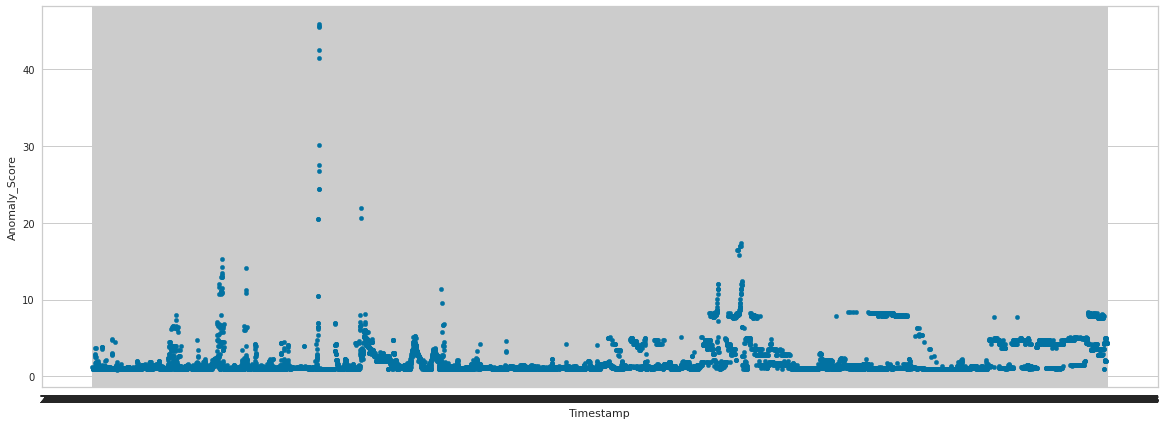

In [25]:
unseen_predictions.plot(x = 'Timestamp', y = 'Anomaly_Score', kind = 'scatter', figsize = (20,7))

In [26]:
plot_model(lof)

In [7]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [27]:
anomaly_rows = unseen_predictions[unseen_predictions["Anomaly"] == 1]
num_an = anomaly_rows.__len__();

num_total = unseen_predictions.__len__()

dataTwo = {'Total number of rows': [num_total], 'Number of anomalies identified': [num_an]}

df = pd.DataFrame(dataTwo)
df.head()

#print(df)

#print(num_an)
#print(num_total)

,Total number of rows,Number of anomalies identified
0,12117,3211
